In [93]:
import os
import bz2
import time
import json
from tqdm import tqdm
import pandas as pd

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# Define the path to the directory: in this case, Journal de Geneve
NEWSPAPER_FOLDER = 'collections'

data = []

# To get the total number of bz2 files beforehand (for accurate progress bar)
total_files = sum(1 for _, _, filenames in os.walk(NEWSPAPER_FOLDER) for f in filenames if f.endswith('.csv'))

i = 0
# Walk through the directory
file_time_start = time.time()
for dirpath, dirnames, filenames in os.walk(NEWSPAPER_FOLDER):
    for filename in tqdm(filenames, total=total_files, desc="Reading files"):
        # Check if the file has a .bz2 extension
        if filename.endswith('.csv'):
            filepath = os.path.join(dirpath, filename)    
            fichier = pd.read_csv(filepath, sep= ";")
            fichier['filename'] = filename
            data.append(fichier)

    print(f'Number of files in {dirpath}: {len(filenames)}. Time taken to read files: {time.time() - file_time_start}')

data = pd.concat(data)

Reading files: 17it [00:00, 112.96it/s]                                                                                                                                                                                                                                            

Number of files in collections: 17. Time taken to read files: 0.1533341407775879


In [ ]:
len(data)

In [94]:
data.head()

uid  type language                    title  size  \
0  JDG-1882-09-01-a-i0001   NaN       fr                    SUSSE  4435   
1  JDG-1902-09-06-a-i0042   NaN       fr       DERNIÈRESJ1ÉPÊCHES   593   
0  LLE-1893-11-18-a-i0007   NaN       fr  L'EXPOSITION DE CHICAGO  1379   
0  IMP-1929-08-17-a-i0004   NaN       fr   AU PIED OU CA\TO€.lMIE  1880   
0  IMP-1935-07-22-a-i0090   NaN       fr                Çn Suisse   605   

  country newspaper             issue pages  nb_pages  ...  \
0      CH       JDG  JDG-1882-09-01-a   1,2         2  ...   
1      CH       JDG  JDG-1902-09-06-a     3         1  ...   
0      CH       LLE  LLE-1893-11-18-a     3         1  ...   
0      CH       IMP  IMP-1929-08-17-a     1         1  ...   
0      CH       IMP  IMP-1935-07-22-a     8         1  ...   

   [total:1,available:100]  [total:3,available:100]  \
0                      NaN                      NaN   
1                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   

   [total:114,available:200] [total:1629,available:1700]  \
0                        NaN                         NaN   
1                        NaN                         NaN   
0                        NaN                         NaN   
0                        NaN                         NaN   
0                        NaN                         NaN   

  [total:87,available:100] [total:10,available:100] [total:33,available:100]  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   
0                      NaN                      NaN                      NaN   

  [total:137,available:200] [total:5,available:100] [total:135,available:200]  
0                       NaN                     NaN                       NaN  
1                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  
0                       NaN                     NaN                       NaN  

[5 rows x 33 columns]

In [103]:
data.columns

Index(['uid', 'type', 'language', 'title', 'size', 'country', 'newspaper',
       'issue', 'pages', 'nb_pages', 'relevance', 'year', 'is_on_front',
       'date', 'persons_mentioned', 'locations_mentioned', 'content',
       'access_right', 'content_provider', 'is_content_available',
       'collections', '[total:2,available:100]', 'filename',
       '[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]',
       '[total:87,available:100]', '[total:10,available:100]',
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]'],
      dtype='object')

In [104]:
data = data.drop(['[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]', 'content_provider', 
       '[total:87,available:100]', '[total:10,available:100]', 'is_content_available', 'access_right', 
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]', '[total:2,available:100]'], axis=1)

In [107]:
data = data.drop(['type'], axis=1)

In [115]:
data = data.drop(['collections'], axis=1)

In [112]:
data = data.drop(['relevance'], axis=1)

In [116]:
data.columns

Index(['uid', 'language', 'title', 'size', 'country', 'newspaper', 'issue',
       'pages', 'nb_pages', 'year', 'is_on_front', 'date', 'persons_mentioned',
       'locations_mentioned', 'content', 'filename', 'glacier'],
      dtype='object')

In [119]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier  
0        Rhone  
1        Rhone  
0  Grindelwald  
0      Arpette  
0         Pers

In [110]:
data['glacier'] = data['filename'].apply(lambda filename: filename[0].upper() + filename[1:-4])

In [160]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier                                       cleaned_text  
0        Rhone  susse gek eve septembre 1882 bulletin politiqu...  
1        Rhone  dernièresj épêches suisse berne double suicide...  
0  Grindelwald  lexposition chicago chicago oclobre 1893 archi...  
0      Arpette  pied lmie notes easra promeneur cliampex comme...  
0         Pers  suisse fête musiques ouvrières fribourg samedi...

In [120]:
import re
data['year'] = data['uid'].apply(lambda x: int(re.search(r'\d{4}', x).group()) if re.search(r'\d{4}', x) else None)

In [ ]:
len(data)

In [154]:
data.dropna(subset=['content'], inplace=True)

In [ ]:
len(data)

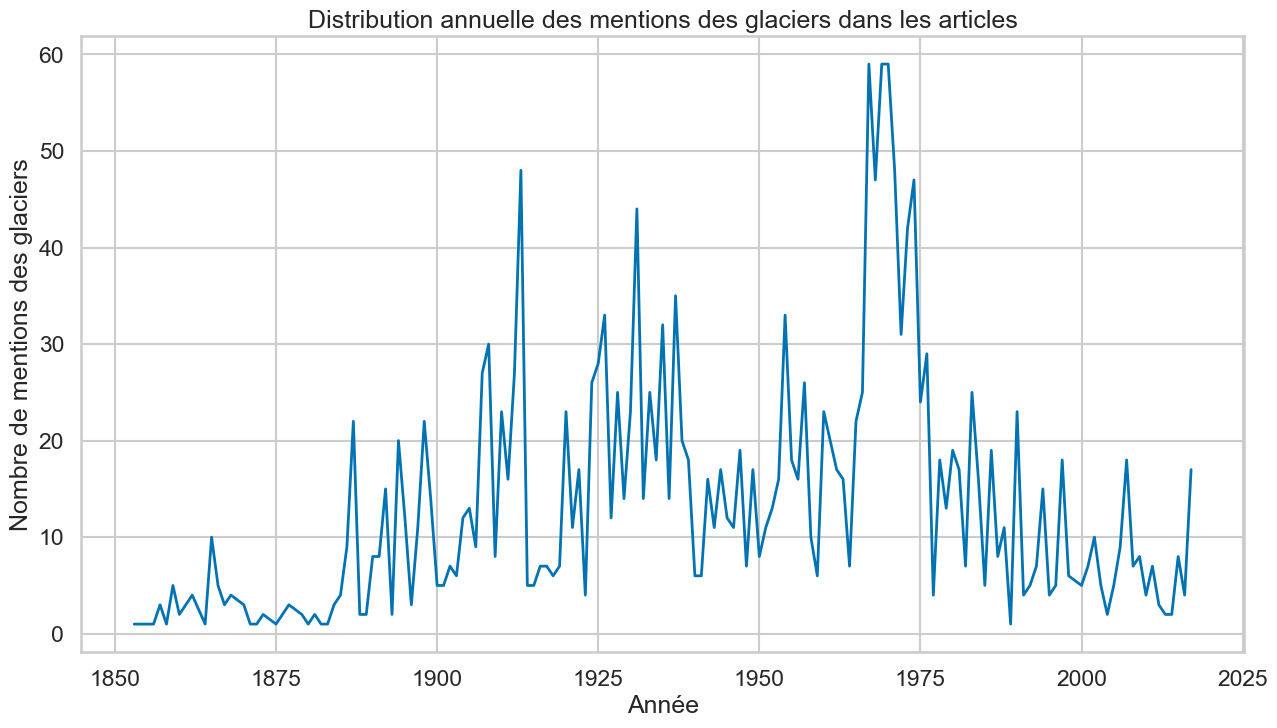

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.)

# Group the data by 'year' and count the number of entries
data_sorted = data.groupby('year').size()

sns.set_palette("colorblind")

# Create the line plot with sorted data
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=data_sorted, linewidth=2)
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de mentions des glaciers')
ax.set_title('Distribution annuelle des mentions des glaciers dans les articles')

plt.show()


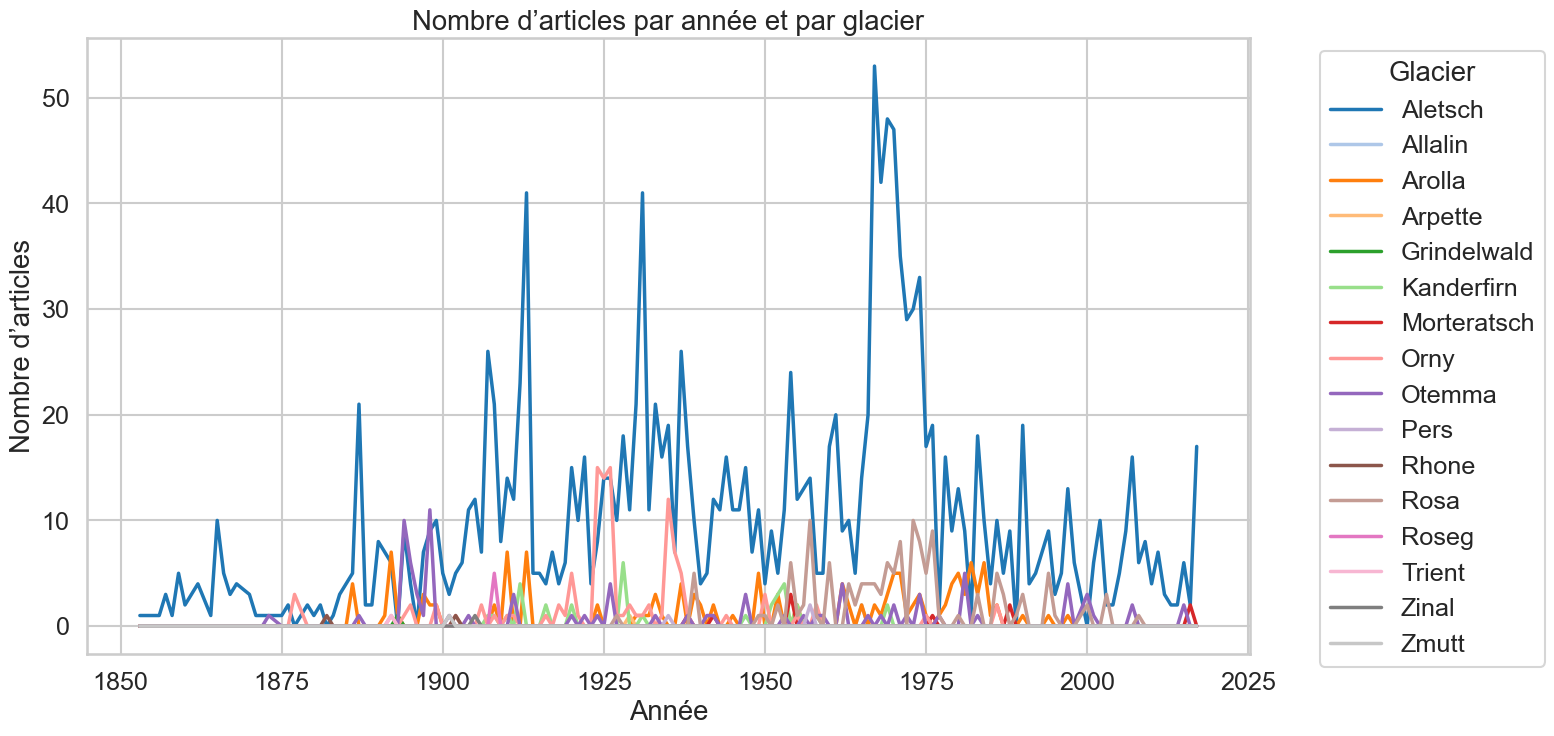

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", context="talk", font_scale=1.1)

no_glaciers = data['glacier'].unique()

# Group the data by 'year' and 'glacier' and count the number of articles
grouped_data = data.groupby(['year', 'glacier']).size().reset_index(name='number_of_articles')

# Pivot the data to get counts of articles per year for each glacier
pivot_data = grouped_data.pivot(index='year', columns='glacier', values='number_of_articles').fillna(0)

# Manually create a palette with 16 distinct colors
palette = sns.color_palette("tab20", n_colors=no_glaciers)

# Create the line plot for each glacier
plt.figure(figsize=(15, 8))
for i, glacier in enumerate(pivot_data.columns):
    sns.lineplot(data=pivot_data[glacier], label=glacier, color=palette[i % no_glaciers], linewidth=2.5)

plt.xlabel('Année')
plt.ylabel('Nombre d’articles')
plt.title('Nombre d’articles par année et par glacier')
plt.legend(title='Glacier', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


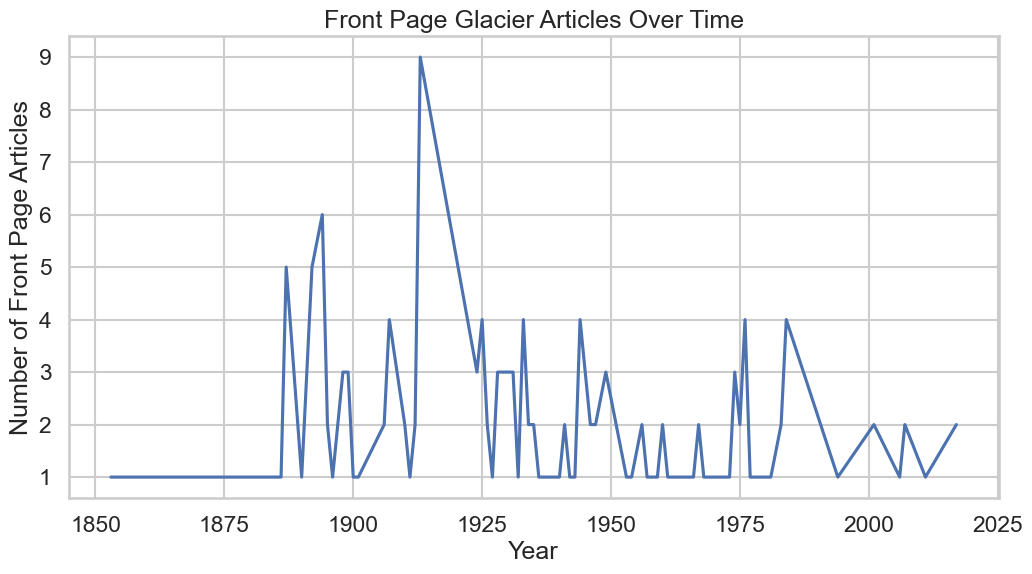

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1)

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front']]

# Group by year and count
front_page_counts = front_page_articles.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=front_page_counts)
plt.title('Front Page Glacier Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Front Page Articles')
plt.show()


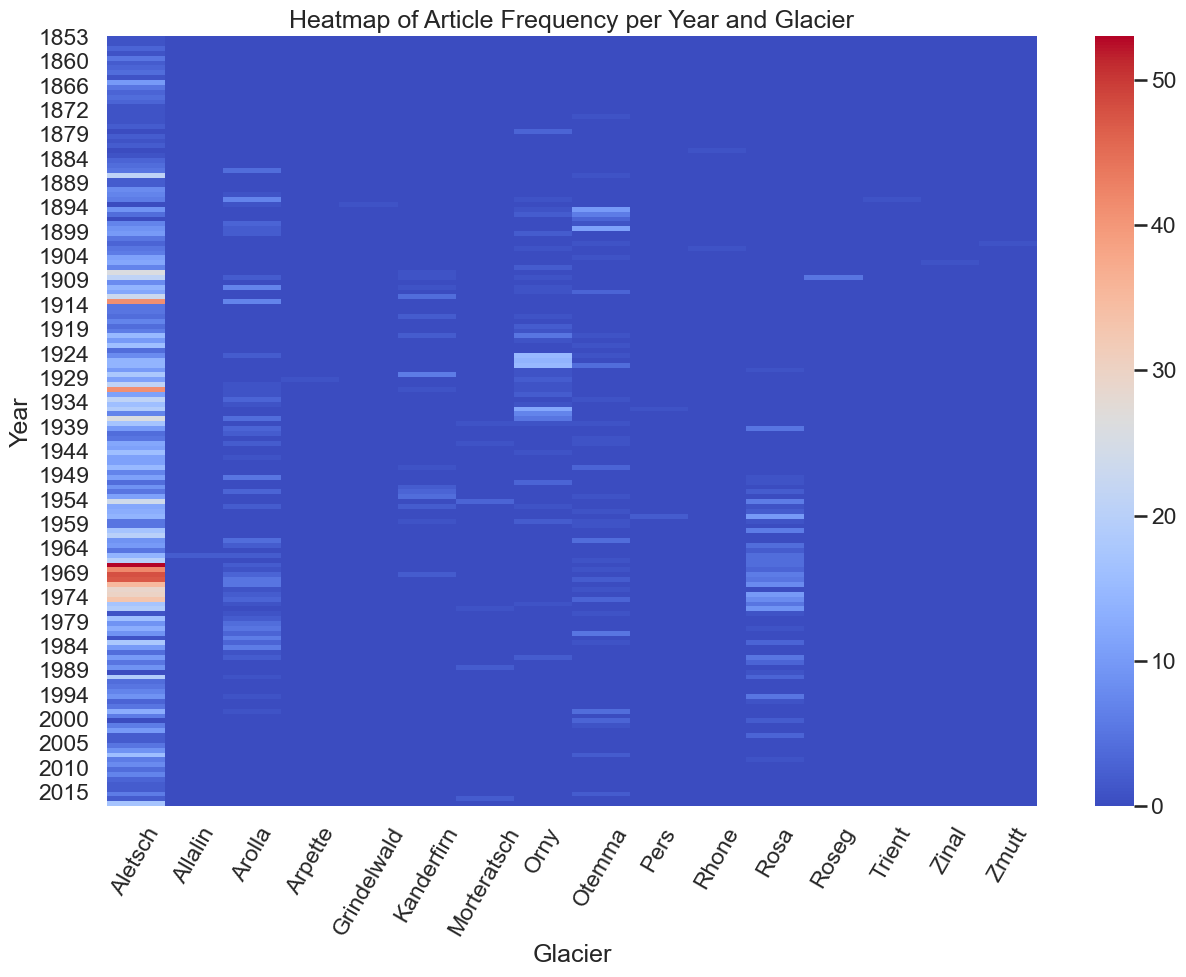

In [219]:
# Group by year and glacier, then count occurrences
article_counts = data.groupby(['year', 'glacier']).size().reset_index(name='count')

# Pivot for heatmap
pivot_data = article_counts.pivot(index='year', columns='glacier', values='count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Article Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


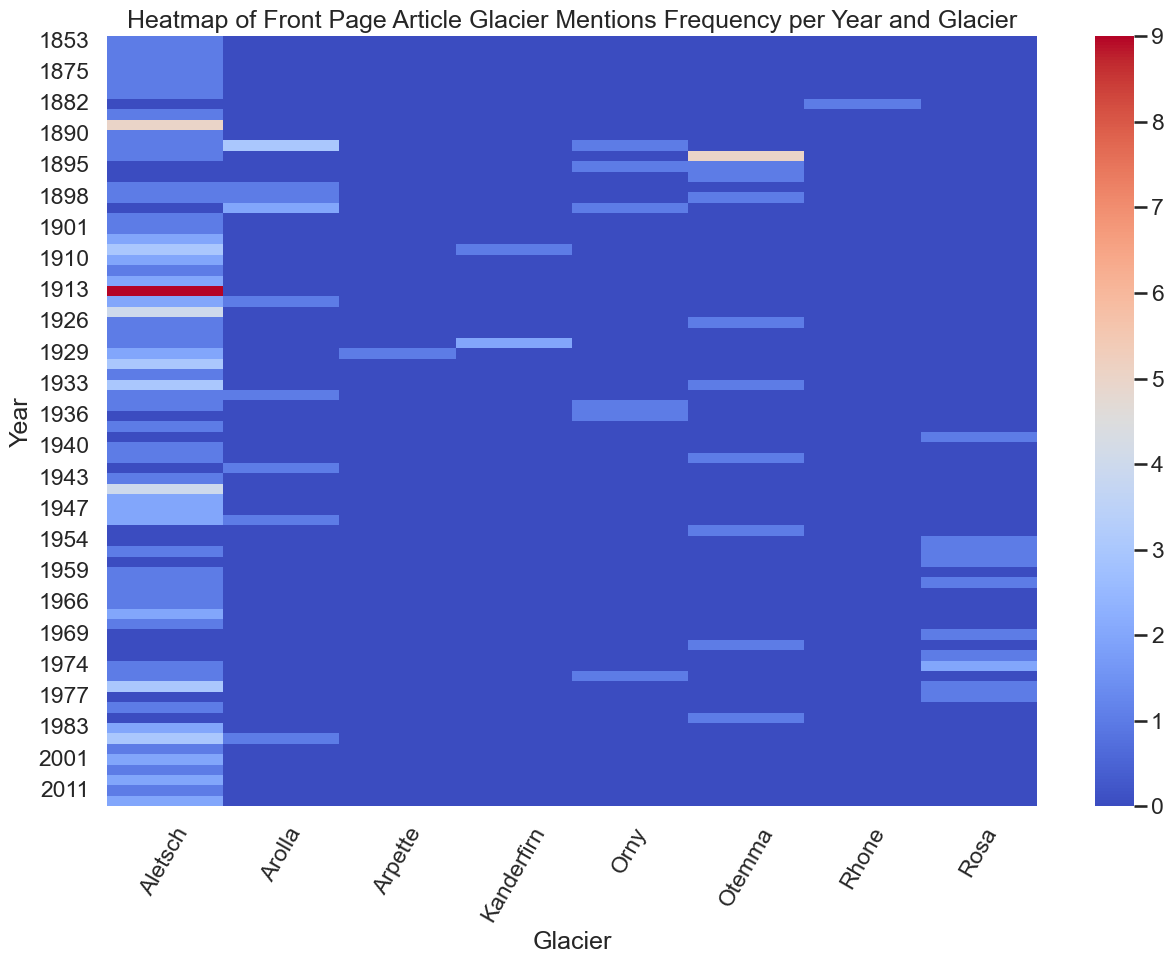

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to include only front-page articles
front_page_articles = data[data['is_on_front'] == True]

# Group by year and glacier, then count occurrences
front_page_article_counts = front_page_articles.groupby(['year', 'glacier']).size().reset_index(name='front_page_count')

# Pivot for heatmap
pivot_data = front_page_article_counts.pivot(index='year', columns='glacier', values='front_page_count').fillna(0)

# Plot
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=False, cmap='coolwarm')
plt.title('Heatmap of Front Page Article Glacier Mentions Frequency per Year and Glacier')
plt.xlabel('Glacier')
plt.ylabel('Year')
plt.xticks(rotation=60)
plt.show()


### What happened in 1913 to Aletsch Glacier (it was on front page many times)?

In [224]:
# Filter for Aletsch Glacier and front-page articles
aletsch_articles = data[(data['glacier'] == 'Aletsch') & (data['is_on_front'] == True)]

# Find the year(s) with the maximum number of front-page mentions
max_mentions_year = aletsch_articles['year'].value_counts().idxmax()

# Filter articles from that year
max_mentions_articles = aletsch_articles[aletsch_articles['year'] == max_mentions_year]

# Display some articles - you can adjust the number of articles to display
print(max_mentions_articles[['title', 'date', 'content']].head())


                                      title                  date  \
786             £g$ manœuvres à la Jimgjran  1913-09-18T00:00:00Z   
789                           A la Jungfrau  1913-09-20T00:00:00Z   
1063  Une intéressante expérience militaire  1913-09-16T00:00:00Z   
1064             La 9 e brigade de montagne  1913-09-17T00:00:00Z   
1066                        Avant le départ  1913-09-18T00:00:00Z   

                                                content  
786   £ _g $ manœuvres a la _Jimgjran Nous avons dit...  
789   A la Jungfrau Le chemin de fer de la Jungfrau,...  
1063  Une interessante experience militaire Thoune, ...  
1064  La 9 brigade de montagne Thoune, le 15 septemb...  
1066  Avant le depart Thoune, le 16 septembre. (De n...  


In [235]:
for index, row in max_mentions_articles.iterrows():
    print(f"Title: {row['title']}")
    print(f"Date: {row['date']}")
    print(f"Content: {row['content'][:400]}\n")
    print("----------------------------------------------------\n")

Title: £g$ manœuvres à la Jimgjran
Date: 1913-09-18T00:00:00Z
Content: £ _g $ manœuvres a la _Jimgjran Nous avons dit qu'un detachement de 520 hommes-, forme d une compagnie de chacun des bataillons d'infanterie de montagne 34,35,36 et d'une compagnie sanitaire de 70 hommes, 'est arrive, mardi matin, de Thoune a Interlaken pair bateau' special. Il est parti a pied, par Lauterbrunnen et _IWengen, pour la Petite Scheidegg, et de la il devait gagner hier matin par chemi

----------------------------------------------------

Title: A la Jungfrau
Date: 1913-09-20T00:00:00Z
Content: A la Jungfrau Le chemin de fer de la Jungfrau, œuvre unique et prodigieuse, transportera bientot les voyageurs eblouis, a 4167 metres, devant un panorama inoubliable. Au moment ou les ckels de notre armee viennent de conduire 500 hommes de troupes a travers le glacier d'Aletsch, au milieu des neiges eternelles du massif de la Jungfrau, il est particulierement interessant de rappeler avec quelques 

--------------

In [168]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import unicodedata


def remove_accents(input_str):
    # Normalize Unicode characters and then encode to ASCII while ignoring non-spacing marks
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])


# Extract the sentence that contain the name of the glacier
def extract_sentence(content, glacier_name):
    content = remove_accents(content)
    sentences = sent_tokenize(content)
    for sentence in sentences:
        if glacier_name.lower() in sentence.lower():
            return sentence
    return None

# Apply the function to each row in the DataFrame
data['sentence_with_glacier'] = data.progress_apply(lambda row: extract_sentence(row['content'], row['glacier']), axis=1)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [00:01<00:00, 1207.44it/s]


In [170]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique dépêche...   
1        Rhone  dernièresj épêches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fête musiques ouvrières fribourg samedi...   

                               sentence_with_glacier  
0  — Dernierement le domestique du chalet du Rose...  
1  Deux etrangers, un monsieur et une dame, origi...  
0  De la , il a a ses pieds la vallee de Lauterbr...  
0  Auparavant, il fallut s'appuyer encore le dete...  
0  — Trois touristes balois, Adolf Egli, 21 ans, ...

In [171]:
# Remove the accents from the text
data['content'] = data['content'].apply(remove_accents)

In [203]:
data['glacier'].unique()

array(['Rhone', 'Grindelwald', 'Arpette', 'Pers', 'Zmutt', 'Orny',
       'Allalin', 'Aletsch', 'Otemma', 'Morteratsch', 'Kanderfirn',
       'Trient', 'Rosa', 'Zinal', 'Roseg', 'Arolla'], dtype=object)

In [204]:
glacier_locations = {
    "Rhone": "Canton du Valais",
    "Grindelwald": "Canton du Berne",
    'Arpette': "Canton du Valais", 
    'Pers': "Canton du Graubünden", 
    'Zmutt': "Canton du Valais",
    'Orny': "Canton du Valais",
    'Allalin': "Canton du Valais",
    'Aletsch': "Canton du Valais",
    'Otemma': "Canton du Valais", 
    'Morteratsch': "Canton du Graubünden", 
    'Kanderfirn': "Canton du Berne",
    'Trient': "Canton du Valais",
    'Rosa': "Canton du Valais", 
    'Zinal': "Canton du Valais",
    'Roseg': "Canton du Graubünden",  
    'Arolla': "Canton du Valais"
}

data['glacier_location'] = data['glacier'].apply(lambda glacier: glacier_locations[glacier])

In [205]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  ...  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882  ...   
1       JDG  JDG-1902-09-06-a     3         1  1902  ...   
0       LLE  LLE-1893-11-18-a     3         1  1893  ...   
0       IMP  IMP-1929-08-17-a     1         1  1929  ...   
0       IMP  IMP-1935-07-22-a     8         1  1935  ...   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  [SUSSE GEK'EVE, major Hart, Les Arabes, Garnet...   
1  1902-09-06T00:00:00Z  [Fritz Meyer, Ernest Ruch, professeur Hans Wir...   
0  1893-11-18T00:00:00Z                                                 []   
0  1929-08-17T00:00:00Z             [Val Perret, Val Perret, Henri BUHLER]   
0  1935-07-22T00:00:00Z  [M. Gottfried Steffen, M. Gottfried Steffen, M...   

                                 locations_mentioned  \
0  [Graham, Graham, Baker, Russell, Graham, Alexa...   
1  [Suisse, Bienne, Bienne, Metz, Rhône, Lucerne,...   
0  [Chicago, Chicago, France, France, Italie, Jap...   
0        [Cologne, Savoie, Venise, Rialto, Martigny]   
0  [Suisse, Fribourg, Fribourg, Suisse, Bâle, Olt...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities      glacier_location  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...      Canton du Valais  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...      Canton du Valais  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...       Canton du Berne  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...      Canton du Valais  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...  Canton du Graubünden  

[5 rows x 21 columns]

# Preprocessing 

In [ ]:
import spacy
import string
from nltk.corpus import stopwords

spacy.cli.download("fr_core_news_lg")

nlp = spacy.load("fr_core_news_lg") # charge le modèle en anglais

spacy_stopwords = list(spacy.lang.fr.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

nltk_stopwords = stopwords.words('french')

spacy_stopwords[:10], punctuation[:10]

In [158]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIÈRESJ 1 ÉPÊCHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Çn Suisse La fête des musiques ouvrières FRIBO...         pers.csv   

       glacier  
0        Rhone  
1        Rhone  
0  Grindelwald  
0      Arpette  
0         Pers

In [172]:
from tqdm import tqdm

from tqdm.notebook import tqdm_notebook  # If you're in a Jupyter environment, otherwise skip this line

# If you're in a Jupyter notebook environment
tqdm_notebook.pandas()

# If you're not in a Jupyter environment
tqdm.pandas()

def preprocess(phrase):
    # Convert to lowercase
    phrase = phrase.lower()

    # Remove tokens that are in the stopword list or are punctuation, and strip whitespace/newlines
    tokens = [token.text.replace('\n', '').strip() for token in nlp(phrase) 
              if token.text.lower() not in spacy_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Rejoin tokens and tokenize again (not always necessary, depends on the use case)
    phrase = ' '.join(tokens).lower()
    tokens = [token.replace('\n', '').strip() for token in word_tokenize(phrase) 
              if token.lower() not in nltk_stopwords + list(punctuation)]

    # Remove short tokens and tokens that are not purely alphabetic again
    tokens = [token for token in tokens if len(token) > 2 and token.isalpha()]
    
    # Return the preprocessed phrase
    if len(tokens) > 0:
        return ' '.join(tokens)
    return None

data['cleaned_text'] = data['content'].progress_apply(preprocess)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [04:35<00:00,  7.84it/s]


In [173]:
data['cleaned_text']

0      susse eve septembre bulletin politique depeche...
1      dernieresj epeches suisse berne double suicide...
0      lexposition chicago chicago oclobre architectu...
0      pied lmie notes easra promeneur cliampex comme...
0      suisse fete musiques ouvrieres fribourg samedi...
                             ...                        
129    touristes peri epuisement froid sommet benito ...
130    varietes enfants journal relate lundi recente ...
131    touriste eiger retrouve vivont budget ordinair...
132    resume informations dimanche aout decouvert gl...
133    rsaxxe chute montagne professeur andre guex ma...
Name: cleaned_text, Length: 2156, dtype: object

# Entity detection (+ exploration of existing entities)

In [174]:
data.iloc[0]['content']

'SUSSE GEK\'EVE, 1 " Septembre 1882. BULLETIN POLITIQUE Les depeches officielles du quartier-general et les recits publies par les journaux anglais completent et rectifient sur certains points les premiers renseignements que nous avait transmis le telegraphe sur le combat du 28 aout. L\'attaque de cette position avancee par les Egyptiens a eu plus ou moins le tere d\'une surprise. Evidemment, on n\'at tendait rien de serieux pour ce jour-la. Sir Cfarnet Wolseley etait a Ismailia ; il avait laisse le general Graham aux avant-postes avec deux bataillons et demi et cinq canons. A cinq milles en arriere, a Mahsamah, se trouvait un corps nombreux de cavalerie, sous les ordres du major-general Drury-Lowe. Le lundi matin, des forces considerables se montrerent en avant de la position, dans plusieurs directions. Un detachement d\'infanterie montee, sous le commandement du major Hart, fut envoye pour reconnaitre ces troupes et fouiller les plis de terrain qui servaient a dissimuler leur marche.

In [72]:
# Example on how to extract entities
doc = nlp(data.iloc[0]['content'])
for ent in doc.ents:
        print(ent.text, '---', ent.label_)

SUSSE GEK'EVE --- MISC
Egyptiens --- LOC
Sir Cfàrnet Wolseley --- PER
Ismaïlia --- LOC
général Graham --- PER
Mahsamah --- MISC
Drury-Lowe --- PER
major Hart --- PER
Tell-el-Kébir --- LOC
Bédouins --- LOC
Gassasin --- LOC
général Graham --- PER
général Lowe --- PER
sir Baker Russell --- PER
Drury-Lowe --- PER
Egyptiens --- LOC
Anglais --- LOC
Arabes --- MISC
marche des Anglais --- MISC
Sir Garnet Wolseley --- PER
général Graham --- PER
Gassasin --- PER
Tell-el-Kébir --- LOC
Alexandrie --- LOC
Ismaïlia --- LOC
Ramleh --- LOC
Arabi --- PER
Mameluks --- LOC
Port-Saïd --- LOC
Arabi --- PER
Garnet Wolseley --- PER
Arabes --- MISC
Tell-el-Kébir --- LOC
Caire --- LOC
Arabi --- PER
Alexandrie --- LOC
Egypte --- LOC
Londres --- LOC
Constantinople --- LOC
Lord Dufferin --- PER
Saïd --- PER
Londres --- LOC
Thessalie --- LOC
conférence de Berlin --- MISC
Karalik-Dervend --- LOC
Platamona --- LOC
Thessalie --- LOC
Macédoine --- LOC
Turcs --- LOC
général Grivas --- PER
Thessalie --- LOC
Athènes --- 

In [ ]:
len(data)

In [178]:
def extract_entities(text):
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ in ['LOC', 'ORG']:
            # Keep only entities > 3 characters
            if len(ent.text) > 3:
                if ent.label_ in ['LOC']:
                    if ent.text[0].isupper():
                        # Keep the LOC entities that start with an upper character
                        entities.append((ent.text, ent.label_))
                else:
                    entities.append((ent.text, ent.label_))
    return entities
    
    
data['entities'] = data['content'].progress_apply(extract_entities)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2156/2156 [04:04<00:00,  8.80it/s]


In [179]:
data['entities']

0      [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...
1      [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...
0      [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...
0      [(St-Gingolph, LOC), (Aiguilles Rouges et du M...
0      [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...
                             ...                        
129    [(Internationale ouvriere socialiste, ORG), (A...
130    [(Notre journal, ORG), (Douves Blanches, LOC),...
131    [(Eiger, LOC), (Celles, LOC), (Conseil, ORG), ...
132    [(Val d'Herens, LOC), (Nyon, LOC), (Lausanne, ...
133    [(Gymnase, LOC), (Ouchy, LOC), (Universite, ORG)]
Name: entities, Length: 2156, dtype: object

In [180]:
data.columns

Index(['uid', 'language', 'title', 'size', 'country', 'newspaper', 'issue',
       'pages', 'nb_pages', 'year', 'is_on_front', 'date', 'persons_mentioned',
       'locations_mentioned', 'content', 'filename', 'glacier', 'cleaned_text',
       'sentence_with_glacier', 'entities'],
      dtype='object')

In [181]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  SUSSE GEK'EVE|major Hart|Les Arabes|Garnet Wol...   
1  1902-09-06T00:00:00Z    Fritz Meyer|Ernest Ruch|professeur Hans Wirchow   
0  1893-11-18T00:00:00Z                                                NaN   
0  1929-08-17T00:00:00Z                 Val Perret|Val Perret|Henri BUHLER   
0  1935-07-22T00:00:00Z  M. Gottfried Steffen|M. Gottfried Steffen|M. F...   

                                 locations_mentioned  \
0  Graham|Graham|Baker|Russell|Graham|Alexandrie|...   
1  Suisse|Bienne|Bienne|Metz|Rhône|Lucerne|Lugano...   
0  CHICAGO|Chicago|France|France|Italie|Japon|Bel...   
0              Cologne|Savoie|Venise|Rialto|Martigny   
0  Suisse|FRIBOURG|Fribourg|Suisse|Bâle|OLTEN|Sol...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...

In [184]:
# Postprocess locations already in the dataframe
data['locations_mentioned'] = data['locations_mentioned'].apply(lambda locations: 
                                                                locations.split('|') if '|' in str(locations) else [])

In [186]:
# Postprocess persons already in the dataframe
data['persons_mentioned'] = data['persons_mentioned'].apply(lambda persons: 
                                                             persons.split('|') if '|' in str(persons) else [])

In [193]:
# Transform all locations: if they are capitalized SUISSE --> Suisse

def postprocess_locations(list_locations):
    return [location[0].upper() + location[1:].lower() for location in list_locations]

data['locations_mentioned'] = data['locations_mentioned'].apply(postprocess_locations)

In [194]:
data.head()

uid language                    title  size country  \
0  JDG-1882-09-01-a-i0001       fr                    SUSSE  4435      CH   
1  JDG-1902-09-06-a-i0042       fr       DERNIÈRESJ1ÉPÊCHES   593      CH   
0  LLE-1893-11-18-a-i0007       fr  L'EXPOSITION DE CHICAGO  1379      CH   
0  IMP-1929-08-17-a-i0004       fr   AU PIED OU CA\TO€.lMIE  1880      CH   
0  IMP-1935-07-22-a-i0090       fr                Çn Suisse   605      CH   

  newspaper             issue pages  nb_pages  year  is_on_front  \
0       JDG  JDG-1882-09-01-a   1,2         2  1882         True   
1       JDG  JDG-1902-09-06-a     3         1  1902        False   
0       LLE  LLE-1893-11-18-a     3         1  1893        False   
0       IMP  IMP-1929-08-17-a     1         1  1929         True   
0       IMP  IMP-1935-07-22-a     8         1  1935        False   

                   date                                  persons_mentioned  \
0  1882-09-01T00:00:00Z  [SUSSE GEK'EVE, major Hart, Les Arabes, Garnet...   
1  1902-09-06T00:00:00Z  [Fritz Meyer, Ernest Ruch, professeur Hans Wir...   
0  1893-11-18T00:00:00Z                                                 []   
0  1929-08-17T00:00:00Z             [Val Perret, Val Perret, Henri BUHLER]   
0  1935-07-22T00:00:00Z  [M. Gottfried Steffen, M. Gottfried Steffen, M...   

                                 locations_mentioned  \
0  [Graham, Graham, Baker, Russell, Graham, Alexa...   
1  [Suisse, Bienne, Bienne, Metz, Rhône, Lucerne,...   
0  [Chicago, Chicago, France, France, Italie, Jap...   
0        [Cologne, Savoie, Venise, Rialto, Martigny]   
0  [Suisse, Fribourg, Fribourg, Suisse, Bâle, Olt...   

                                             content         filename  \
0  SUSSE GEK'EVE, 1 " Septembre 1882. BULLETIN PO...        rhone.csv   
1  DERNIERESJ 1 EPECHES Suisse BERNE. — Double su...        rhone.csv   
0  LEXPOSITION DE CHICAGO Chicago , le 6 oclobre ...  grindelwald.csv   
0  AU PIED OU CA \ TO €. lMIE Notes « fi'easra pr...      arpette.csv   
0  Cn Suisse La fete des musiques ouvrieres FRIBO...         pers.csv   

       glacier                                       cleaned_text  \
0        Rhone  susse eve septembre bulletin politique depeche...   
1        Rhone  dernieresj epeches suisse berne double suicide...   
0  Grindelwald  lexposition chicago chicago oclobre architectu...   
0      Arpette  pied lmie notes easra promeneur cliampex comme...   
0         Pers  suisse fete musiques ouvrieres fribourg samedi...   

                               sentence_with_glacier  \
0  — Dernierement le domestique du chalet du Rose...   
1  Deux etrangers, un monsieur et une dame, origi...   
0  De la , il a a ses pieds la vallee de Lauterbr...   
0  Auparavant, il fallut s'appuyer encore le dete...   
0  — Trois touristes balois, Adolf Egli, 21 ans, ...   

                                            entities  
0  [(Egyptiens, LOC), (Tell-el-Kebir, LOC), (Bedo...  
1  [(DERNIERESJ 1, LOC), (Bienne, LOC), (Nidau, L...  
0  [(CHICAGO Chicago, LOC), (Pa-J, LOC), (Beaux-A...  
0  [(St-Gingolph, LOC), (Aiguilles Rouges et du M...  
0  [(Samedi, LOC), (Fribourg, LOC), (frequentee, ...

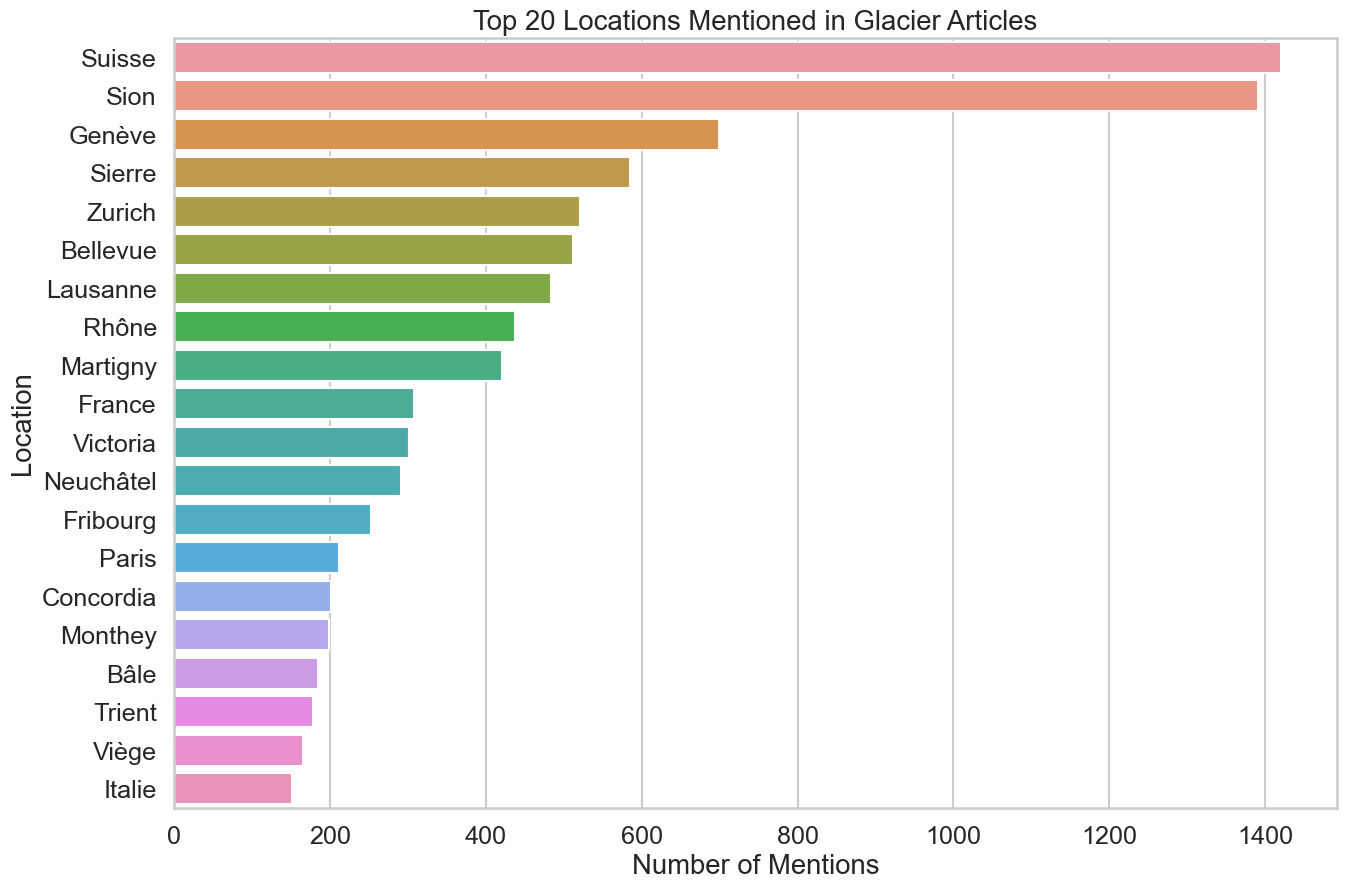

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

sns.set_palette("colorblind")

# Flatten the list of locations_mentioned into a single list
all_locations = [location for sublist in data['locations_mentioned'] for location in sublist]

# Count occurrences of each location
location_counts = Counter(all_locations)

# Convert to DataFrame for easy plotting
location_df = pd.DataFrame(location_counts.items(), columns=['Location', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Location', data=location_df.head(20)) # Adjust the number as needed
plt.title('Top 20 Locations Mentioned in Glacier Articles')
plt.xlabel('Number of Mentions')
plt.ylabel('Location')
plt.show()


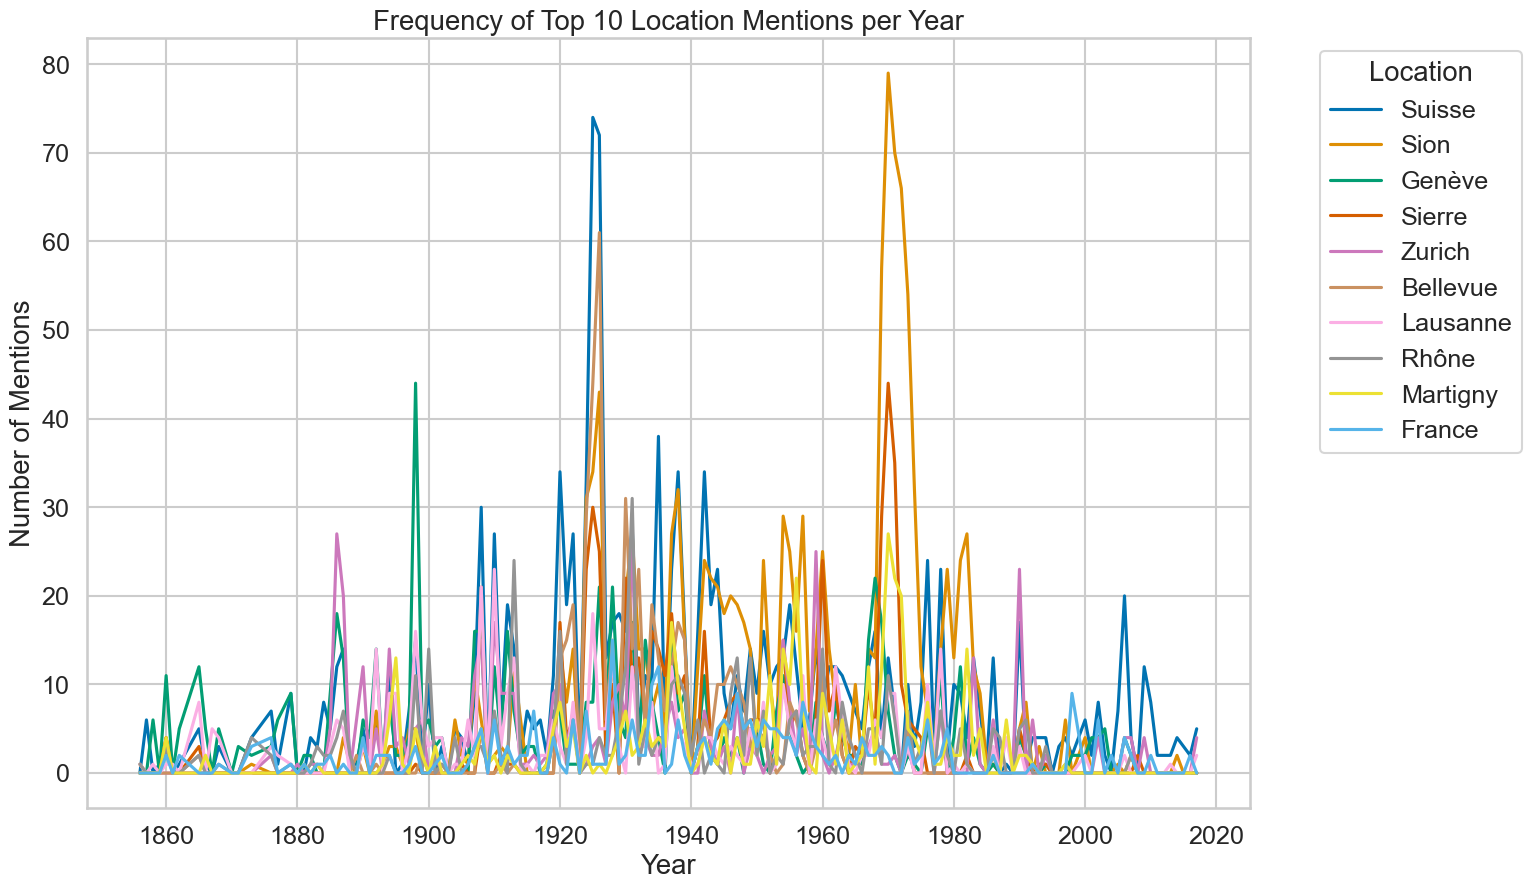

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Expand the 'locations_mentioned' column into a row for each location
locations_expanded = data.explode('locations_mentioned')

# Group by year and location, then count occurrences
location_counts_per_year = locations_expanded.groupby(['year', 'locations_mentioned']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='locations_mentioned', values='count').fillna(0)


# Identify the most common locations (you can adjust the number)
num_top_locations = 10  # For example, top 5 locations
top_locations = pivot_data.sum().sort_values(ascending=False).head(num_top_locations).index

# Plotting only the most common locations
plt.figure(figsize=(15, 10))
for location in top_locations:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title(f'Frequency of Top {num_top_locations} Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


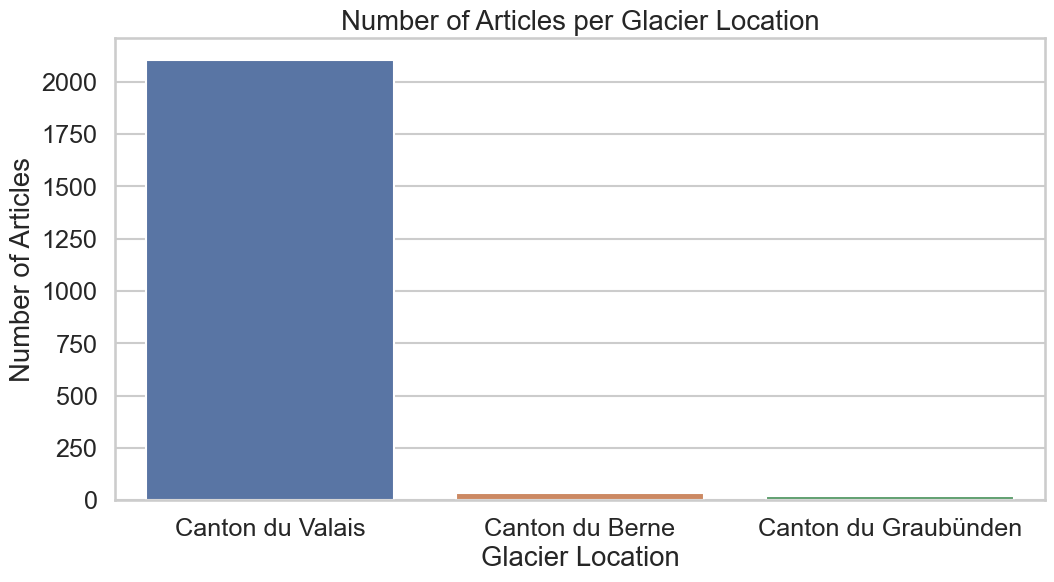

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Count the number of articles per glacier location
glacier_location_counts = data['glacier_location'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=glacier_location_counts.index, y=glacier_location_counts.values)
plt.xlabel('Glacier Location')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Glacier Location')
plt.xticks(rotation=0)
plt.show()


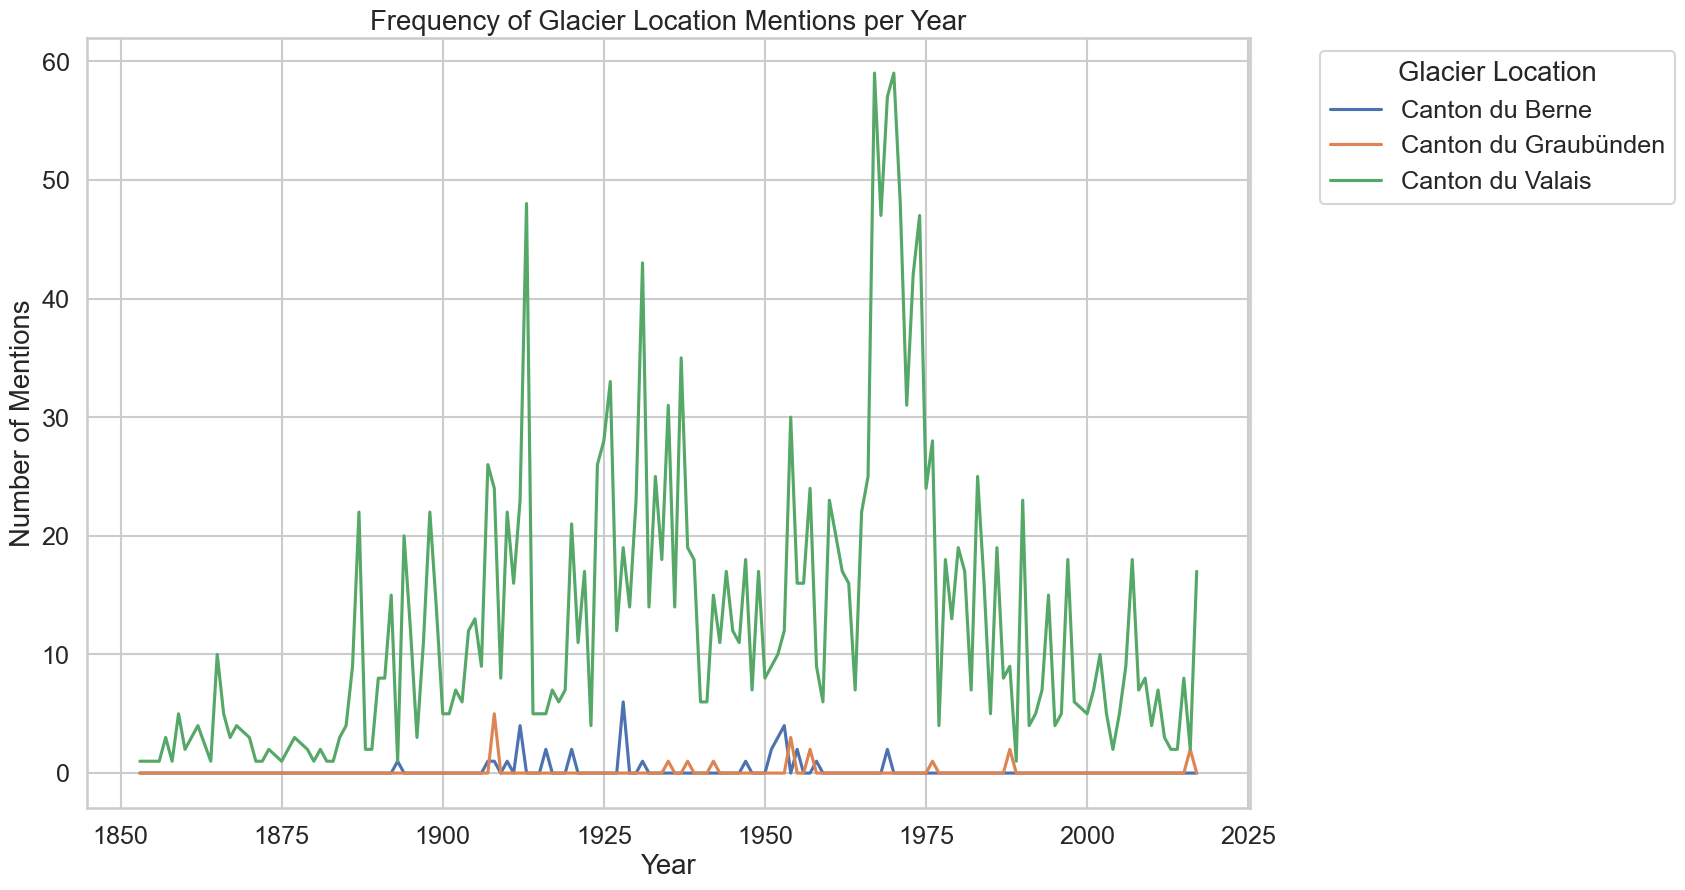

In [214]:
# Group by year and glacier location, then count occurrences
location_counts_per_year = data.groupby(['year', 'glacier_location']).size().reset_index(name='count')

# Pivot for plotting
pivot_data = location_counts_per_year.pivot(index='year', columns='glacier_location', values='count').fillna(0)

# Plotting - you can adjust the number of glacier locations to display
plt.figure(figsize=(15, 10))
for location in pivot_data.columns:
    sns.lineplot(data=pivot_data[location], label=location)

plt.title('Frequency of Glacier Location Mentions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend(title='Glacier Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [31]:
#!pip install keybert
#!pip install flair

In [ ]:
# kw_model = KeyBERT()
# keywords = kw_model.extract_keywords(doc)

In [76]:
# from keybert import KeyBERT
# from flair.embeddings import TransformerDocumentEmbeddings

# roberta = TransformerDocumentEmbeddings('camembert-base')
# kw_model = KeyBERT(model=roberta)

In [45]:
# data['cleaned_text'].iloc[0]

In [77]:
# kw_model.extract_keywords(data['content'].iloc[0], keyphrase_ngram_range=(3, 3), use_mmr=True, diversity=0.7)

## Topic detection

In [ ]:
from bertopic import BERTopic

desired_number_of_topics = 20

topic_model = BERTopic(language="french", calculate_probabilities=True, verbose=True,
                       nr_topics=desired_number_of_topics)

topics, probs = topic_model.fit_transform(data["cleaned_text"])

Batches:   0%|          | 0/68 [00:00<?, ?it/s]

In [238]:
topic_model.get_topic_info()

Topic  Count                                             Name  \
0      -1    480                      -1_hotel_ete_glacier_suisse   
1       0    235                           0_ete_bien_glacier_ans   
2       1    213                       1_conseil_ete_etat_federal   
3       2    120                    2_ski_office_tourisme_curling   
4       3    118                        3_ete_accident_cabane_ans   
5       4    111                     4_hiver_pied_sports_tourisme   
6       5     61                  5_protection_nature_ligue_foret   
7       6     58                 6_pilote_avion_appareil_aviation   
8       7     50         7_bataillon_compagnie_infanterie_brigade   
9       8     47          8_glaciers_glacier_metres_rechauffement   
10      9     46                     9_tourisme_pied_saas_station   
11     10     40                    10_anglaise_eglise_freres_alt   
12     11     38               11_hotel_prospectus_pension_hotels   
13     12     37                      12_hotel_cafe_pension_grand   
14     13     34                 13_avs_glacier_eggishorn_aletsch   
15     14     29                        14_zone_tir_gravite_armes   
16     15     28                       15_hotel_hotels_lits_grand   
17     16     26                           16_dranse_ete_eau_pont   
18     17     26            17_hotel_hotels_excursions_promenades   
19     18     25               18_altitude_riederalp_metres_furka   
20     19     24                       19_hotel_pension_dep_grand   
21     20     23                    20_jungfrau_tunnel_fer_chemin   
22     21     23              21_millions_energie_production_eaux   
23     22     21           22_concert_disques_musique_telejournal   
24     23     20                     23_lits_vacances_juin_hotels   
25     24     19                       24_hotel_prix_hotels_prosp   
26     25     17            25_breiten_piscine_appartement_kurort   
27     26     17                       26_hiver_sports_soleil_ski   
28     27     15                     27_lac_glace_glacier_moraine   
29     28     15         28_balcons_cuisine_tranquillite_burgener   
30     29     15                  29_points_caf_record_cortaillod   
31     30     14                  30_pension_hotel_dep_prospectus   
32     31     14                31_agassiz_glaciers_glacier_louis   
33     32     14                     32_hotel_hotels_prosp_lagger   
34     33     13            33_ovomaltine_grison_cabane_erratique   
35     34     13          34_janvier_confortable_situation_maison   
36     35     13         35_visperterminen_champery_saas_sentiers   
37     36     12                36_timbres_timbre_emission_signes   
38     37     11                       37_hotel_hot_centre_hotels   
39     38     11                 38_guides_sommet_ascension_arete   
40     39     10  39_jungfraujoch_recherches_observatoire_glacier   

                                       Representation  \
0   [hotel, ete, glacier, suisse, aletsch, pension...   
1   [ete, bien, glacier, ans, suisse, temps, faire...   
2   [conseil, ete, etat, federal, assemblee, contr...   
3   [ski, office, tourisme, curling, ecole, chalet...   
4   [ete, accident, cabane, ans, crevasse, tourist...   
5   [hiver, pied, sports, tourisme, saas, sion, ze...   
6   [protection, nature, ligue, foret, suisse, reg...   
7   [pilote, avion, appareil, aviation, ete, vol, ...   
8   [bataillon, compagnie, infanterie, brigade, he...   
9   [glaciers, glacier, metres, rechauffement, rec...   
10  [tourisme, pied, saas, station, aletsch, fee, ...   
11  [anglaise, eglise, freres, alt, poste, telegra...   
12  [hotel, prospectus, pension, hotels, dep, pros...   
13  [hotel, cafe, pension, grand, restaurant, llot...   
14  [avs, glacier, eggishorn, aletsch, bettmeralp,...   
15  [zone, tir, gravite, armes, mercredi, jeudi, m...   
16  [hotel, hotels, lits, grand, sejour, centre, i...   
17  [dranse, ete, eau, pont, feu, heures, glacier,...   
18  [hotel, hotels, ex

In [241]:
topic_names = topic_model.topic_labels_

In [244]:
len(data)

2156

In [245]:
topic_names

{-1: '-1_hotel_ete_glacier_suisse',
 0: '0_ete_bien_glacier_ans',
 1: '1_conseil_ete_etat_federal',
 2: '2_ski_office_tourisme_curling',
 3: '3_ete_accident_cabane_ans',
 4: '4_hiver_pied_sports_tourisme',
 5: '5_protection_nature_ligue_foret',
 6: '6_pilote_avion_appareil_aviation',
 7: '7_bataillon_compagnie_infanterie_brigade',
 8: '8_glaciers_glacier_metres_rechauffement',
 9: '9_tourisme_pied_saas_station',
 10: '10_anglaise_eglise_freres_alt',
 11: '11_hotel_prospectus_pension_hotels',
 12: '12_hotel_cafe_pension_grand',
 13: '13_avs_glacier_eggishorn_aletsch',
 14: '14_zone_tir_gravite_armes',
 15: '15_hotel_hotels_lits_grand',
 16: '16_dranse_ete_eau_pont',
 17: '17_hotel_hotels_excursions_promenades',
 18: '18_altitude_riederalp_metres_furka',
 19: '19_hotel_pension_dep_grand',
 20: '20_jungfrau_tunnel_fer_chemin',
 21: '21_millions_energie_production_eaux',
 22: '22_concert_disques_musique_telejournal',
 23: '23_lits_vacances_juin_hotels',
 24: '24_hotel_prix_hotels_prosp',
 

In [ ]:
# Add topic names to the DataFrame
data['topics'] = data['topic'].map(topic_model.get_topic_names())

# Print the DataFrame with the new 'topic_name' column
print(data.head())


In [ ]:
topic_names = {
    0: "Topic_Name_1", 
    1: "Topic_Name_2",
    # Add other topics here
}

In [55]:
topics_over_time = topic_model.topics_over_time(data["cleaned_text"], data.year.to_list(), nr_bins=20)

20it [00:06,  2.87it/s]


In [59]:
topics_over_time

Topic                                              Words  Frequency  \
0       -1                       on, plus, fazy, pays, genève          4   
1       12  voyageurs, soussigné, jouit, eggishorn, méridi...          8   
2       16                savons, eggischhorn, qu, sans, plus          1   
3       26          jungfrau, ried, mœrell, wellig, eggishorn          1   
4       31       qu, genève, débarquement, français, empereur          1   
..     ...                                                ...        ...   
377     26          femmes, kliniken, pommier, manon, finesse          1   
378     28       zero, uno, rappellent, centenaire, aériennes          2   
379     32      hong, kong, expositions, journées, adaptation          2   
380     44  glaciers, 2015, reynald, températures, réchauf...          2   
381     45    moosfluh, glissement, mouvement, terrain, pente          8   

     Timestamp  
0     1852.836  
1     1852.836  
2     1852.836  
3     1852.836  
4     1852.836  
..         ...  
377   2008.800  
378   2008.800  
379   2008.800  
380   2008.800  
381   2008.800  

[382 rows x 4 columns]

In [17]:
# df = pd.DataFrame({'topic': topics, 'document': data["cleaned_text"], 'location':filename})

In [60]:
data["topics"] = topics

In [84]:
data.to_csv('final_data.csv')

In [70]:
data['entities'].iloc[1]

[('DERNIÈRESJ 1 ÉPÊCHES', 'ORG'),
 ('Suisse BERNE', 'LOC'),
 ('Double', 'LOC'),
 ('Bruneau', 'PER'),
 ('Bienne', 'LOC'),
 ('Fritz Meyer', 'PER'),
 ('Ernest Ruch', 'PER'),
 ('Nidau', 'LOC'),
 ('Erlenhof', 'LOC'),
 ('Bienne', 'LOC'),
 ('Meyer', 'PER'),
 ('Ruch', 'LOC'),
 ('Meyer', 'PER'),
 ('Ruch', 'LOC'),
 ('VALAIS', 'ORG'),
 ('Brigue', 'LOC'),
 ('Conch', 'LOC'),
 ('Metz', 'LOC'),
 ('glacier dû Rhône', 'LOC'),
 ('Glùringen', 'LOC'),
 ('Munster', 'LOC'),
 ('Mardi', 'LOC'),
 ('TESSIN', 'MISC'),
 ('Insolation', 'LOC'),
 ('Notre', 'LOC'),
 ('Tessin', 'LOC'),
 ('Lucerne', 'LOC'),
 ('Lugano', 'LOC'),
 ('Guidotti', 'PER'),
 ('Scmione', 'PER'),
 ('France A', 'LOC'),
 ('Martinique PARIS', 'LOC'),
 ('Fqrt-de-France', 'LOC'),
 ('Guadeloupe', 'LOC'),
 ('Svchet', 'LOC'),
 ('Basse-Terre', 'LOC'),
 ('NEW-YORK', 'LOC'),
 ('Port-Castries', 'LOC'),
 ('Pavane', 'PER'),
 ('Trinidad', 'LOC'),
 ('Saint-Vincent', 'LOC'),
 ('Port-Castries', 'LOC'),
 ('5 h.', 'LOC'),
 ('NANTES', 'LOC'),
 ('colonel de St-Rémy', 

In [20]:
data_climate_change = data[data["topics"] == 0]

In [21]:
data_climate_change.iloc[2].content

'Les arrestations de communistes à Zurich :\'" ;\'<. \\.\'.\'. / i Les 20 personnes arrêtées au cours des bagarres d\'Aussersihl et du poste de police 4, ont été interrogées pendant la nuit et relaxées. Plusieurs seront. citées devant le juge pour résistance à la police. "V Jeudi soir, les communiisl. es avaient encore convoqué une assemblée des ouvriers du bâtiment et du bois au Casino du quartier de l\'Industrie ,, mais les participa « ts à cette assemblée s\'en aillèrent suite manifester aussi devant la Maison du Peuple d\'Aussersihl. L\'avion sur le glacier * (Retardé par le St-Barthélemy). — L\'aviateur Ernest Udet a fait, vendredi, dans la matinée, avec succès, cinq atterrissages successifs sur le glacier : trois sur le glacier d\'Orny, un sur le glacier du Trient et un entre les deux, à vingt mètres de la cabane Dupuis. L\'opérateur Schneeberger, qui l\'accompagnait, a pris, grâce au temps et aux circonstances favorables, toujours en vue du film « Au Mont-Blanc, ciel étoile >, d

In [22]:
data_climate_change.columns

Index(['uid', 'type', 'language', 'title', 'size', 'country', 'newspaper',
       'issue', 'pages', 'nb_pages', 'relevance', 'year', 'is_on_front',
       'date', 'persons_mentioned', 'locations_mentioned', 'content',
       'access_right', 'content_provider', 'is_content_available',
       'collections', '[total:2,available:100]', 'filename',
       '[total:1,available:100]', '[total:3,available:100]',
       '[total:114,available:200]', '[total:1629,available:1700]',
       '[total:87,available:100]', '[total:10,available:100]',
       '[total:33,available:100]', '[total:137,available:200]',
       '[total:5,available:100]', '[total:135,available:200]', 'cleaned',
       'cleaned_text', 'topics'],
      dtype='object')

In [23]:
df

topic                                           document    location
0        0  susse gek eve septembre 1882 bulletin politiqu...  arolla.csv
1       -1  dernièresj épêches suisse berne double suicide...  arolla.csv
0       25  lexposition chicago chicago oclobre 1893 archi...  arolla.csv
0       -1  pied lmie notes easra promeneur cliampex comme...  arolla.csv
0       26  suisse fête musiques ouvrières fribourg samedi...  arolla.csv
..     ...                                                ...         ...
129     -1  touristes péri épuisement froid sommet benito ...  arolla.csv
130     -1  variétés enfants journal relaté lundi récente ...  arolla.csv
131      0  touriste eiger retrouve vivont budget ordinair...  arolla.csv
132     -1  résumé informations dimanche août découvert gl...  arolla.csv
133     46  rsaxxe chute montagne professeur andré guex ma...  arolla.csv

[2156 rows x 3 columns]

In [65]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [66]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[7,18])

In [26]:
keywords = ['réchauffement', 'réchauffe', 'climatique', 'glacier','glacière', 'météo','calotte glaciaire', 'érosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
'dégel','permafrost','géomorphologie','dérèglement','vague de chaleur','gaz à effet de serre','masse glaciaire']

In [27]:
from nltk.tokenize import word_tokenize
from functools import partial

def get_frequency(phrase, keyword):
    
    return phrase.count(keyword)

def get_total(phrase):
    total = 0
    for keyword in keywords:
        total += phrase.count(keyword)
    return total

for keyword in keywords: 
    data[keyword] = data['cleaned_text'].progress_apply(partial(get_frequency, keyword))

data['total'] = data['cleaned_text'].progress_apply(get_total)

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

  0%|          | 0/2156 [00:00<?, ?it/s]

In [28]:
len(data)

2156

In [79]:
# data.corr()

In [29]:
new_data = data[data.total > 0]

In [30]:
new_data

uid  type language  \
0    JDG-1882-09-01-a-i0001   NaN       fr   
1    JDG-1902-09-06-a-i0042   NaN       fr   
0    LLE-1893-11-18-a-i0007   NaN       fr   
0    IMP-1929-08-17-a-i0004   NaN       fr   
0    IMP-1935-07-22-a-i0090   NaN       fr   
..                      ...   ...      ...   
129  LSE-1933-08-26-a-i0045   NaN       fr   
130  LSE-1934-08-15-a-i0004   NaN       fr   
131  LSE-1937-07-21-a-i0043   NaN       fr   
132  LSE-1939-08-14-a-i0007   NaN       fr   
133  LSE-1940-08-20-a-i0044   NaN       fr   

                                                 title  size country  \
0                                                SUSSE  4435      CH   
1                                   DERNIÈRESJ1ÉPÊCHES   593      CH   
0                              L'EXPOSITION DE CHICAGO  1379      CH   
0                               AU PIED OU CA\TO€.lMIE  1880      CH   
0                                            Çn Suisse   605      CH   
..                                                 ...   ...     ...   
129  Sept touristes auraient péri d’épuisement et d...  2593      CH   
130                                           VARIÉTÉS   444      CH   
131             Un touriste de l’Eiger retrouve vivont  2334      CH   
132                            RÉSUMÉ DES INFORMATIONS   556      CH   
133                                           L\rSAXXE   302      CH   

    newspaper             issue pages  nb_pages  ...  inlandsis  iceberg  \
0         JDG  JDG-1882-09-01-a   1,2         2  ...          0        0   
1         JDG  JDG-1902-09-06-a     3         1  ...          0        0   
0         LLE  LLE-1893-11-18-a     3         1  ...          0        0   
0         IMP  IMP-1929-08-17-a     1         1  ...          0        0   
0         IMP  IMP-1935-07-22-a     8         1  ...          0        0   
..        ...               ...   ...       ...  ...        ...      ...   
129       LSE  LSE-1933-08-26-a     8         1  ...          0        0   
130       LSE  LSE-1934-08-15-a     1         1  ...          0        0   
131       LSE  LSE-1937-07-21-a     8         1  ...          0        0   
132       LSE  LSE-1939-08-14-a     2         1  ...          0        0   
133       LSE  LSE-1940-08-20-a     6         1  ...          0        0   

     dégel permafrost géomorphologie dérèglement vague de chaleur  \
0        0          0              0           0                0   
1        0          0              0           0                0   
0        0          0              0           0                0   
0        0          0              0           0                0   
0        0          0              0           0                0   
..     ...        ...            ...         ...              ...   
129      0          0              0           0                0   
130      0          0              0           0                0   
131      0          0              0           0                0   
132      0          0              0           0                0   
133      0          0              0           0                0   

    gaz à effet de serre masse glaciaire total  
0                      0               0     1  
1                      0               0     1  
0                      0               0     1  
0                      0               0     2  
0                      0               0     2  
..                   ...             ...   ...  
129                    0               0     2  
130                    0               0     1  
131                    0               0     2  
132                    0               0     1  
133                    0               0     1  

[2056 rows x 57 columns]

In [31]:
len(new_data)

2056

In [32]:
new_data['content'].loc[1628]

"Variétés. On lit dans le Courrier de la Gironde : «Le navire français Médoc, en charge aux îles Chin-bas, pour Bordeaux, a perdu son capitaine dans des circonstances dramatiques qui sont relatées par le rapport suivant du novice Roy, échappé du sinistre. » Le canot, parti du navire à la voile avec une légère brise, vers onze heures du matin, s'est dirigé sur l'île Blanche, sur laquelle le capitaine Detroyat et son ami M. __.hu, sont descendus. Après un quart d'heure environ et avoir tiré plusieurs coups de fusil, ils se sont, rembarques. » A un demi mille de cette île, le vent plus fort, un ris dans la voile, le capitaine a déchargé son fusil sur un oiseau qu'il a tué. Il vira de bord que le canot à chaviré. Chacun d'eux s'est pris sur la quille ; le capitaine a été couper la drisse de foc et la drisse de pic et le novice Roy la hauban, afin de démâter l'embarcation, ce à quoi ils ont réussi en tirant fortement sur le mât. Le canot se redressa Immédiatement, mais plein d'eau. L'ami du

In [33]:
from nltk.tokenize import sent_tokenize

unique_sentences = set()

#premère ligne à vérifier 
for text in new_data['content']:
    for sent in sent_tokenize(text):
    #for sent in sent_tokenize(new_data['text'].loc[86405]):
        for keyword in keywords:
            if keyword in sent:
                if sent not in unique_sentences:
                    print(keyword, '----------', sent)
                    print()
                    unique_sentences.add(sent)
                break
                #print(keyword, '----------', sent)
                #print()

glacier ---------- — Dernièrement le domestique du chalet du Rosenlaui, nommé K. Schlœppi, âgé de 80 ans, avait voulu accompagner, avec un autre guide, une famille anglaise au glacier dû Rhône ; la nuit se passa à l'auberge de Guttannen (route du Griinsel), et le matin il se portait parfaitement bien ; mais à deux lieues de là, au moment où la caravane arrivait à la Handeck, Schlaippi, qui conduisait le cheval d'une dame, tomba mort subitement sur le chemin.

glacier ---------- Deux étrangers, un monsieur et une dame, originaires de Metz, yenant du glacier dû Rhône, étaient arrivés à Glùringen, petit village situé près de Munster.

glacier ---------- De là , il a à ses pieds la vallée de Lauterbrunnen , avec la cascade du Giesbach , le village deMiiren ; Îrais vient la réunion dos deux Lutschinen , e lac de Thoune et les admirables séjours de Beatenberg , où était autrefois la grotte de Saint-Béat , une vue des montagnes lucernoises et du Jura ; le spectateur voit ensuite à ses pieds u

In [34]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

sid = SentimentIntensityAnalyzer()

pos = neg = neu = cumul_pos = cumul_neg = cumul_neu = 0

for text in new_data['content']:
    for sent in sent_tokenize(text):
        sentiment_scores = sid.polarity_scores(sent)  
        compound_score = sentiment_scores["compound"]

        for keyword in keywords:
            if keyword in sent:
                print(keyword, '----------', sent)

                if compound_score >= 0.05:
                    sentiment = "Positive"
                    pos += 1
                elif compound_score <= -0.05:
                    sentiment = "Negative"
                    neg += 1
                else:
                    sentiment = "Neutral"
                    neu += 1
                
                print(f"Sentiment: {sentiment}")
                print(keyword)
                print('Positive', pos)
                print('Negative',neg)
                print('Neutral',neu)
        cumul_pos+=pos
        cumul_neg+=neg
        cumul_neu+=neu

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/valentin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


glacier ---------- — Dernièrement le domestique du chalet du Rosenlaui, nommé K. Schlœppi, âgé de 80 ans, avait voulu accompagner, avec un autre guide, une famille anglaise au glacier dû Rhône ; la nuit se passa à l'auberge de Guttannen (route du Griinsel), et le matin il se portait parfaitement bien ; mais à deux lieues de là, au moment où la caravane arrivait à la Handeck, Schlaippi, qui conduisait le cheval d'une dame, tomba mort subitement sur le chemin.
Sentiment: Neutral
glacier
Positive 0
Negative 0
Neutral 1
glacier ---------- Deux étrangers, un monsieur et une dame, originaires de Metz, yenant du glacier dû Rhône, étaient arrivés à Glùringen, petit village situé près de Munster.
Sentiment: Neutral
glacier
Positive 0
Negative 0
Neutral 2
glacier ---------- De là , il a à ses pieds la vallée de Lauterbrunnen , avec la cascade du Giesbach , le village deMiiren ; Îrais vient la réunion dos deux Lutschinen , e lac de Thoune et les admirables séjours de Beatenberg , où était autrefo

In [35]:
total = cumul_pos+cumul_neg+cumul_neu
print('Positive:', cumul_pos, 'In percentage:',cumul_pos/total*100)
print('Negative:',cumul_neg, 'In percentage:',cumul_neg/total*100)
print('Neutral:',cumul_neu, 'In percentage:',cumul_neu/total*100)

Positive: 36484592 In percentage: 15.339725684545384
Negative: 20484827 In percentage: 8.61272141608076
Neutral: 180874417 In percentage: 76.04755289937385


In [36]:
data.total.describe()

count    2156.000000
mean        2.655844
std         3.551323
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        71.000000
Name: total, dtype: float64

In [37]:
data['cleaned_text'].isnull().sum()

0

In [38]:
data.dropna(subset=['cleaned_text'], inplace=True)

In [39]:
import numpy as np

list_a = [1, 1, 1, 1, 1]
list_b = [2, 2, 2, 2, 2]

np.hstack([list_a, list_b]) # Exemple de fonctionnement de cette méthode avec des listes

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [40]:
freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data['cleaned_text']]))

In [41]:
for word in ['climat', 'réchauffement', 'réchauffe', 'climatique', 'glacier', 'glaciers','glacière', 'météo',
'fonte','calotte glaciaire', 'érosion','alpinisme','niveau de la mer','banquise','inlandsis','iceberg',
'dégel','permafrost','géomorphologie','dérèglement','vague de chaleur','gaz à effet de serre','masse glaciaire']:
    print(word, ':', freq[word])

climat : 250
réchauffement : 105
réchauffe : 6
climatique : 184
glacier : 4187
glaciers : 753
glacière : 9
météo : 18
fonte : 99
calotte glaciaire : 0
érosion : 8
alpinisme : 117
niveau de la mer : 0
banquise : 0
inlandsis : 3
iceberg : 2
dégel : 2
permafrost : 4
géomorphologie : 2
dérèglement : 2
vague de chaleur : 0
gaz à effet de serre : 0
masse glaciaire : 0


In [42]:
for word in ['a neuve', 'aletsch', 'allalin', 'arolla', 'arpette', 'berons', 'cervin', 'corbassière', 'darrey',
'dolent', 'evole', 'fee', 'ferpècle', 'fiesch', 'findelen', 'finsteraar', 'forno', 'gauli', 'giesen',
'gorner', 'grands', 'giétro', 'inférieur grindelwald', 'supérieur grindelwald', 'grindelwald', 'kanderfirn', 'lang',
'lauteraar', 'martinets', 'moiry', 'moming', 'mont-miné', 'morteratsch', 'oberaar', 'orny', 'otemma',
'palü', 'pers', 'petoudes', 'plaine morte', 'planereuses', 'plines', 'ravines rousses', 'rhône', 'ried',
'plateau rosa', 'roseg', 'saleinaz', 'silvretta', 'théodule', 'tourtemagne', 'treutsebo', 'trient',
'trift (gadmen)', 'tsanfleuron', 'tschierva', 'unteraar', 'zinal', 'zmutt']:
        print(word, ':', freq[word])

a neuve : 0
aletsch : 2451
allalin : 48
arolla : 606
arpette : 14
berons : 0
cervin : 564
corbassière : 11
darrey : 0
dolent : 3
evole : 1
fee : 369
ferpècle : 135
fiesch : 338
findelen : 8
finsteraar : 0
forno : 0
gauli : 2
giesen : 0
gorner : 35
grands : 273
giétro : 0
inférieur grindelwald : 0
supérieur grindelwald : 0
grindelwald : 133
kanderfirn : 38
lang : 17
lauteraar : 0
martinets : 0
moiry : 41
moming : 5
mont-miné : 4
morteratsch : 14
oberaar : 3
orny : 270
otemma : 143
palü : 0
pers : 21
petoudes : 0
plaine morte : 0
planereuses : 0
plines : 2
ravines rousses : 0
rhône : 458
ried : 63
plateau rosa : 0
roseg : 8
saleinaz : 68
silvretta : 11
théodule : 34
tourtemagne : 128
treutsebo : 0
trient : 213
trift (gadmen) : 0
tsanfleuron : 5
tschierva : 1
unteraar : 9
zinal : 179
zmutt : 16


In [43]:
print(freq.most_common(25))

[('hôtel', 6374), ('glacier', 4187), ('tél', 2703), ('grand', 2689), ('suisse', 2542), ('aletsch', 2451), ('pension', 2176), ('hotel', 2030), ('hôtels', 1814), ('station', 1764), ('alpes', 1727), ('prix', 1641), ('mètres', 1622), ('sion', 1615), ('valais', 1604), ('centre', 1528), ('prospectus', 1510), ('montagne', 1501), ('zermatt', 1474), ('route', 1470), ('bien', 1415), ('lac', 1347), ('ans', 1295), ('jusqu', 1288), ('fer', 1254)]


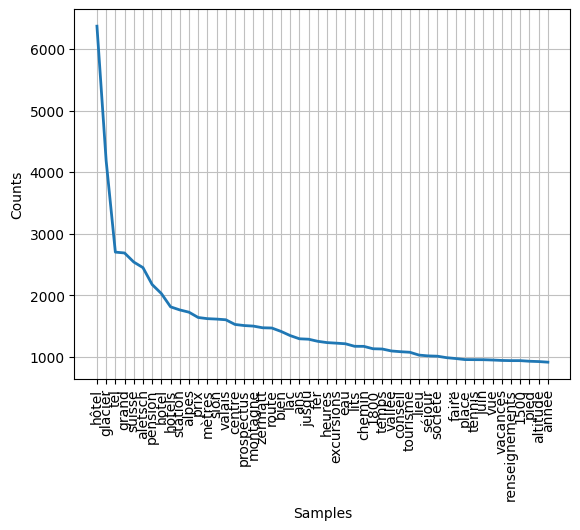

In [44]:
_ = freq.plot(50, cumulative=False)

In [82]:
import nltk
import numpy as np

yearly_freq_dict = {}

for year in sorted(data['year'].unique()):
    data_year = data[data['year'] == year]['cleaned_text']
    
    freq = nltk.FreqDist(np.hstack([text.split(' ') if len(str(text)) > 0 else " " for text in data_year]))
    
    yearly_freq_dict[year] = freq.most_common(5)

for year, freq_dist in yearly_freq_dict.items():
    print(f"Year: {year}, Frequency Distribution: {freq_dist}")

Year: 1853, Frequency Distribution: [('glacier', 5), ('glace', 5), ('point', 4), ('bien', 3), ('tel', 2)]
Year: 1856, Frequency Distribution: [('plus', 11), ('sans', 8), ('quelques', 6), ('aussi', 6), ('savons', 5)]
Year: 1857, Frequency Distribution: [('plus', 20), ('jungfrau', 14), ("l'eggishorn", 13), ('glacier', 12), ('depuis', 9)]
Year: 1858, Frequency Distribution: [('genève', 6), ('fazy', 5), ("l'on", 4), ('depuis', 3), ('chemin', 3)]
Year: 1859, Frequency Distribution: [('hotel', 5), ('valais', 5), ('suisse', 5), ('fera', 5), ('efforts', 5)]
Year: 1860, Frequency Distribution: [('genève', 12), ('cette', 10), ('pays', 10), ('...', 10), ('gex', 8)]
Year: 1861, Frequency Distribution: [('grand', 9), ('glacier', 9), ('brigue', 8), ('soussigné', 6), ("qu'il", 6)]
Year: 1862, Frequency Distribution: [('capitaine', 15), ('cette', 14), ('heures', 14), ('plus', 12), ('jungfrau', 12)]
Year: 1864, Frequency Distribution: [('chalet', 1), ('glacier', 1), ("d'âletsch", 1), ('riederalp', 1), 